In [1]:
!pip install --upgrade pip setuptools wheel

In [1]:
!pip install --force-reinstall numpy
!pip install --force-reinstall pandas

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
df.replace('?', pd.NA, inplace=True)

In [8]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols]

In [11]:
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_numerical), columns=[f"{col}_std" for col in numerical_cols])

In [12]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_numerical), columns=[f"{col}_minmax" for col in numerical_cols])


In [13]:
df_scaled = pd.concat([df, df_standard_scaled, df_minmax_scaled], axis=1)

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [15]:
# Count unique values (cardinality) in each categorical column
cat_cardinality = df[categorical_cols].nunique()
cat_cardinality

,0
workclass,9
education,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2
native_country,42
income,2


In [16]:
# Columns with <5 categories → One-Hot Encoding
low_card_cols = cat_cardinality[cat_cardinality < 5].index.tolist()
low_card_cols

# Columns with ≥5 categories → Label Encoding
high_card_cols = cat_cardinality[cat_cardinality >= 5].index.tolist()
high_card_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [17]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = pd.DataFrame(
    ohe.fit_transform(df[low_card_cols]),
    columns=ohe.get_feature_names_out(low_card_cols)
)


In [18]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoded = df[high_card_cols].apply(lambda col: LabelEncoder().fit_transform(col))


In [19]:
# Drop original categorical columns
df_non_cat = df.drop(columns=categorical_cols)

# Combine all together
df_encoded = pd.concat([df_non_cat, onehot_encoded, label_encoded], axis=1)


In [20]:
df_encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,sex_ Male,income_ >50K,workclass,education,marital_status,occupation,relationship,race,native_country
0,39,77516,13,2174,0,40,1.0,0.0,7,9,4,1,1,4,39
1,50,83311,13,0,0,13,1.0,0.0,6,9,2,4,0,4,39
2,38,215646,9,0,0,40,1.0,0.0,4,11,0,6,1,4,39
3,53,234721,7,0,0,40,1.0,0.0,4,1,2,6,0,2,39
4,28,338409,13,0,0,40,0.0,0.0,4,9,2,10,5,2,5


In [21]:
def categorize_age(age):
    if age < 25:
        return 'young'
    elif age < 45:
        return 'middle_age'
    elif age < 65:
        return 'senior'
    else:
        return 'retired'

df['age_group'] = df['age'].apply(categorize_age)
df['age_group']

,age_group
0,middle_age
1,senior
2,middle_age
3,senior
4,middle_age
...,...
32556,middle_age
32557,middle_age
32558,senior
32559,young


In [22]:
df['capital_net'] = df['capital_gain'] - df['capital_loss']
df['capital_net']


,capital_net
0,2174
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [23]:
# Check skew of numeric columns
print(df[['capital_gain', 'capital_loss', 'fnlwgt']].skew())


capital_gain    11.953848
capital_loss     4.594629
fnlwgt           1.446980
dtype: float64


In [24]:
import numpy as np
# Apply log(1 + x) to handle 0s safely
# Apply log transformation
df['log_capital_gain'] = np.log1p(df['capital_gain'])
df['log_capital_loss'] = np.log1p(df['capital_loss'])


In [25]:
from sklearn.ensemble import IsolationForest

In [26]:
# Use numerical features for Isolation Forest
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [27]:
# Initialize and fit the model
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(numeric_df)

In [28]:
# Mark outliers (-1 means outlier)
df['outlier'] = outliers

In [29]:
# Remove outliers
df_no_outliers = df[df['outlier'] == 1].drop(columns='outlier')

In [1]:
pip install ppscore

In [30]:
import ppscore as pps

In [31]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

In [33]:
# Filter only predictive power towards target (e.g., 'income')
pps_target = pps.predictors(df_no_outliers, 'income')
pps_target.sort_values(by='ppscore', ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capital_net,income,3.957981e-01,classification,True,weighted F1,0.665318,0.797785,DecisionTreeClassifier()
1,capital_gain,income,2.806105e-01,classification,True,weighted F1,0.665318,0.759233,DecisionTreeClassifier()
2,log_capital_gain,income,2.806105e-01,classification,True,weighted F1,0.665318,0.759233,DecisionTreeClassifier()
3,education,income,2.316922e-01,classification,True,weighted F1,0.665318,0.742861,DecisionTreeClassifier()
4,education_num,income,2.316922e-01,classification,True,weighted F1,0.665318,0.742861,DecisionTreeClassifier()
5,capital_loss,income,1.530355e-01,classification,True,weighted F1,0.665318,0.716536,DecisionTreeClassifier()
6,log_capital_loss,income,1.530355e-01,classification,True,weighted F1,0.665318,0.716536,DecisionTreeClassifier()
7,workclass,income,8.030622e-02,classification,True,weighted F1,0.665318,0.692195,DecisionTreeClassifier()
8,native_country,income,4.608168e-04,classification,True,weighted F1,0.665318,0.665472,DecisionTreeClassifier()
9,marital_status,income,1.300368e-07,classification,True,weighted F1,0.665318,0.665318,DecisionTreeClassifier()


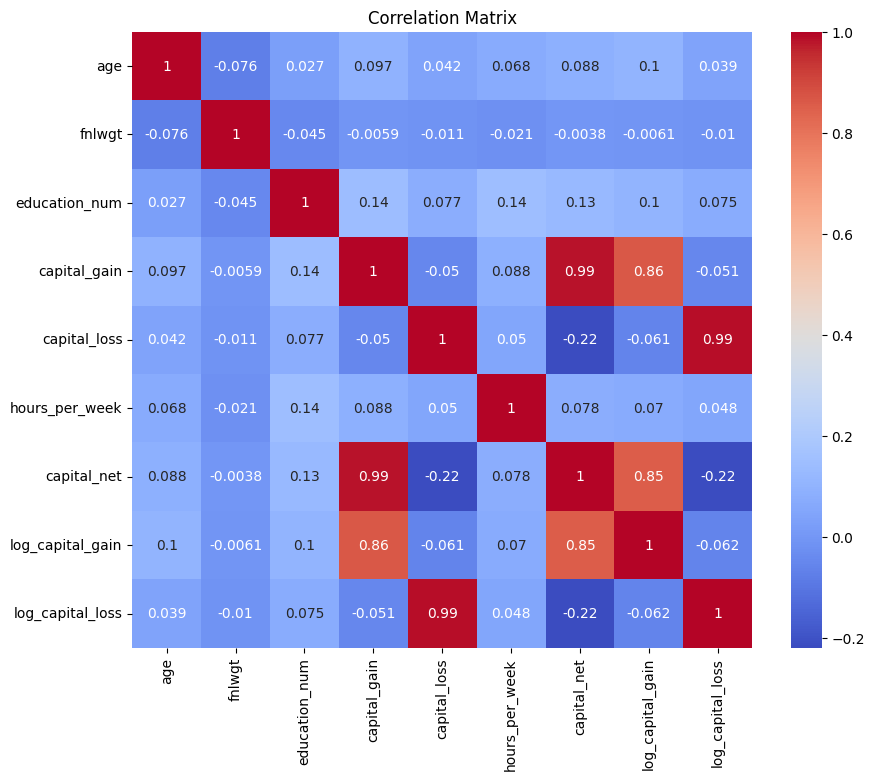

In [34]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()